# Función Schwefel 2.23

La **función Schwefel 2.23** es una función continua, diferenciable, no separable, escalable y unimodal. Está definida como:

$$ f(x) = \sum_{i=1}^{D} x_i^{10} $$

Donde:

$$ x_i \in [-10, 10] $$


La solución global conocida es:

$$ x^* = (0, 0, \dots, 0) $$ 
con $$ f(x^*) = 0 $$


In [1]:
import numpy as np

# Función objetivo
def schwefel_223(x):
    return np.sum(x**10)

# Gradiente de la función
def gradient(x):
    return 10 * x**9

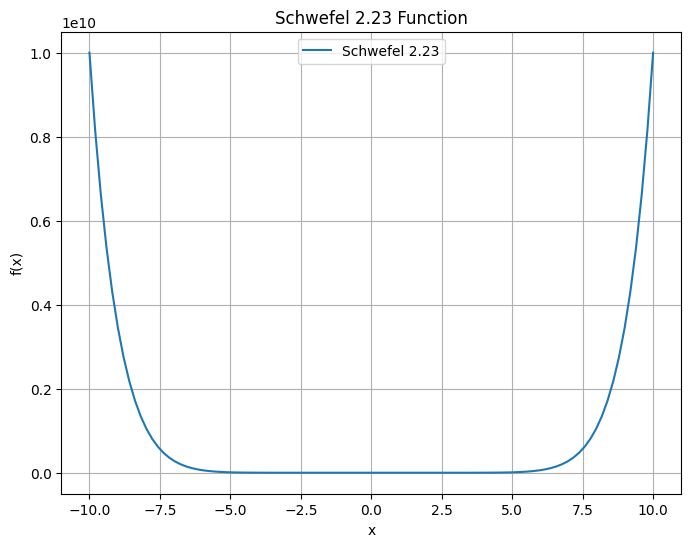

In [2]:
import matplotlib.pyplot as plt

# Definir la función schwefel_223
def schwefel_223(x):
    return np.sum(x**10)

# Generar valores de x para diferentes tamaños
x_values = np.linspace(-10, 10, 100)  # Puedes cambiar los límites y el número de puntos
y_values = []

# Evaluar la función para cada valor de x
for x in x_values:
    y_values.append(schwefel_223(np.array([x])))

# Graficar la función
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Schwefel 2.23')
plt.title("Schwefel 2.23 Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()


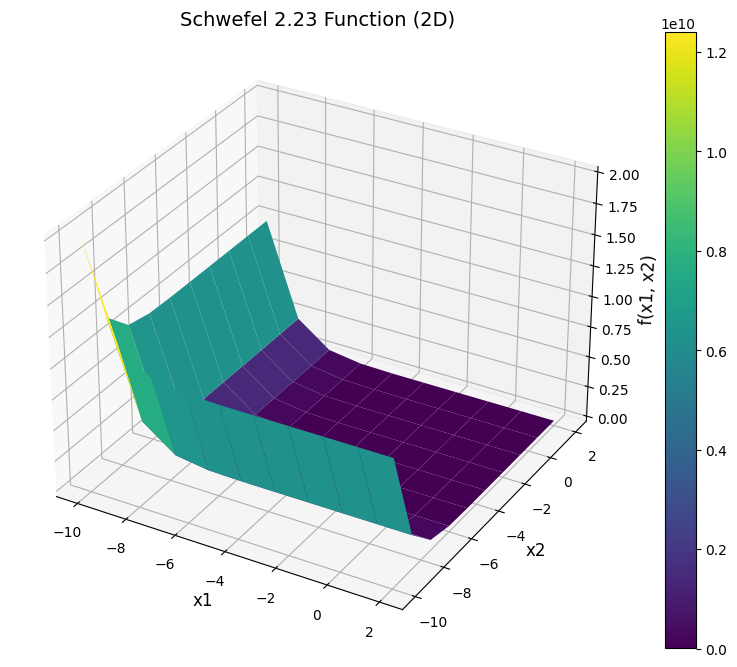

In [3]:
from mpl_toolkits.mplot3d import Axes3D

# Crear una cuadrícula de valores de x1 y x2
x1_values = np.linspace(-10, 2, 10)
x2_values = np.linspace(-10, 2, 10)
X1, X2 = np.meshgrid(x1_values, x2_values)

# Evaluar la función Schwefel 2.23 para cada par (x1, x2)
Z = np.array([schwefel_223(np.array([x1, x2])) for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
Z = Z.reshape(X1.shape)

# Crear la figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie
surf = ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none')

# Añadir etiquetas y título
ax.set_title("Schwefel 2.23 Function (2D)", fontsize=14)
ax.set_xlabel("x1", fontsize=12)
ax.set_ylabel("x2", fontsize=12)
ax.set_zlabel("f(x1, x2)", fontsize=12)

# Añadir barra de colores
fig.colorbar(surf)

plt.show()


In [4]:
import time

In [5]:
def iter_algorithm(times, run_algorithm, D):
    solutions = []
    run_times = []
    for i in range(times):
        solution, time = run_algorithm(D)
        solutions.append(solution)
        run_times.append(time)
    return solutions,run_times

def algorithm_per_dim(times, run_algorithm, num_dim):
    mean_solutions = []
    mean_times = []
    for d in range(num_dim):
        solutions,run_times = iter_algorithm(times,run_algorithm,d+1)
        mean_sol = np.mean(np.abs(solutions))
        mean_time = np.mean(run_times)
        mean_solutions.append(mean_sol)
        mean_times.append(mean_time)
    return mean_solutions,mean_times

In [6]:
times = 5
num_dim = 20

### 1. **Algoritmo de Newton**
El **`Método de Newton`** es ideal para funciones continuas y diferenciables, ya que utiliza la derivada y la segunda derivada (Hessiano) para aproximar el mínimo local rápidamente. Dado que la función **`Schwefel 2.23`** es diferenciable, el método de Newton puede converger rápidamente al mínimo global si se inicia en un punto cercano al óptimo.
- **Ventaja**: Alta eficiencia en términos de convergencia cuando las derivadas están disponibles. Si el Hessiano está bien condicionado, puede alcanzar el óptimo en pocas iteraciones.
- **Desventaja**: Es sensible a la elección del punto de inicio y puede quedar atrapado en mínimos locales si se aplica a funciones más complejas con múltiples mínimos.



In [7]:
def hessian(x):
    return np.diag(90 * x**8)

def newton_method(x0, max_iter=100, tol=1e-6):
    x = x0
    for _ in range(max_iter):
        grad = gradient(x)
        H = hessian(x)
        x_new = x - np.linalg.inv(H) @ grad
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return x, schwefel_223(x)

def run_newton_method(D):
    # Inicialización
    x0 = np.random.uniform(-10, 10, D)
    init_time = time.time()
    sol, val = newton_method(x0)
    end_time = time.time()
    # print(f"Solución: {sol}, Valor de la función: {val}")
    return val, end_time-init_time

newton_sols, newton_times = algorithm_per_dim(times, run_newton_method, num_dim)


### 2. **Evolución Diferencial**
Este algoritmo es adecuado para problemas de optimización no lineales y no diferenciables. Aunque la función **`Schwefel 2.23`** es diferenciable, el **`Algoritmo de Evolución Diferencial`** es una buena opción para buscar el mínimo global en espacios de búsqueda grandes y multimodales, ya que explora soluciones sin necesitar información sobre derivadas.
- **Ventaja**: No requiere el cálculo de derivadas y es capaz de explorar grandes espacios de búsqueda, lo que lo hace adecuado para evitar caer en mínimos locales.
- **Desventaja**: La evolución diferencial puede ser computacionalmente costosa, especialmente cuando el número de variables o dimensiones es grande, lo que puede resultar en tiempos de convergencia lentos.


#### Implementación con SciPy:


In [8]:
from scipy.optimize import differential_evolution

def run_differential_evolution(D):
    # Inicialización
    bounds = [(-10, 10)] * D  # Definir los límites para cada variable
    init_time = time.time()
    result = differential_evolution(schwefel_223, bounds)
    end_time = time.time()
    # print(f"Solución: {result.x}, Valor de la función: {result.fun}")
    return result.fun, end_time-init_time

diff_evol_sols, diff_evol_times = algorithm_per_dim(times, run_differential_evolution, num_dim)




### 3. **Algoritmo Genético**
Los algoritmos genéticos son útiles para funciones de optimización que son complejas o tienen un gran número de variables. Este enfoque es bueno para evitar mínimos locales debido a su capacidad de realizar búsquedas globales utilizando operaciones de `selección, cruce` y `mutación`. Aunque la función **`Schwefel 2.23`** es unimodal, los algoritmos genéticos pueden ser una buena opción si se desconoce la estructura de la función o si se sospecha que es compleja.
- **Ventaja**: Su naturaleza estocástica le permite explorar un amplio espacio de búsqueda y evita mínimos locales. Es flexible y se puede adaptar a diferentes tipos de problemas de optimización.
- **Desventaja**: Tiende a ser más lento en converger y puede requerir muchas iteraciones, además de depender de la configuración de parámetros como la tasa de mutación y el tamaño de la población.

#### Implementación con DEAP:



In [9]:
import time
import random
from deap import base, creator, tools, algorithms

# Definir las clases solo una vez
if not hasattr(creator, "FitnessMin"):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    
if not hasattr(creator, "Individual"):
    creator.create("Individual", list, fitness=creator.FitnessMin)

# Definir la función schwefel_223
def schwefel_223_(individual):
    return (np.sum(np.array(individual) ** 10),)

# Definir el algoritmo genético
def run_genetic_algorithm(D):

    random.seed(42)

    # Crear la caja de herramientas para el algoritmo genético
    toolbox = base.Toolbox()

    # Definir los atributos del individuo (valores en el rango [-10, 10])
    toolbox.register("attr_float", random.uniform, -10, 10)
    # Definir un individuo que es una lista de floats
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=D)
    # Definir una población (lista de individuos)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    # Definir la función objetivo
    toolbox.register("evaluate", schwefel_223_)
    # Definir los operadores genéticos (selección, cruce y mutación)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=100, indpb=0.1)
    toolbox.register("select", tools.selTournament, tournsize=3)

    # Inicializar la población
    population = toolbox.population(n=100)
    
    # Definir los parámetros del algoritmo genético
    cxpb, mutpb, ngen = 0.5, 0.2, 40

    init_time = time.time()
    # Ejecutar el algoritmo genético
    algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, verbose=False)
    end_time = time.time()
    
    # Obtener el mejor individuo
    best_individual = tools.selBest(population, k=1)[0]
    return best_individual.fitness.values[0], end_time - init_time

genetic_alg_sols, genetic_alg_times = algorithm_per_dim(times, run_genetic_algorithm, num_dim)


### 4. **Optimización por Enjambre de Partículas (PSO)**
**`PSO`** es un algoritmo basado en la naturaleza que utiliza un enfoque colaborativo para explorar el espacio de búsqueda. Cada partícula actualiza su posición en función de su mejor posición conocida y la mejor posición conocida del enjambre. Este algoritmo es adecuado para funciones continuas como la función **`Schwefel 2.23`** y puede proporcionar buenos resultados sin requerir derivadas.
- **Ventaja**: La colaboración entre las partículas permite que el algoritmo explore el espacio de búsqueda de manera eficiente y tenga una alta probabilidad de encontrar el mínimo global. Es fácil de implementar y no requiere derivadas.
- **Desventaja**: Puede ser propenso a la convergencia prematura si las partículas se agrupan en torno a un óptimo local, lo que limita su capacidad de encontrar el mínimo global en algunos casos.

#### Implementación con Pyswarm:

In [10]:
from pyswarm import pso

def run_particle_swarm(D):
    # Definir límites de las variables
    lb = [-10] * D
    ub = [10] * D

    init_time = time.time()
    # Ejecutar PSO
    best_position, best_value = pso(schwefel_223, lb, ub)
    end_time = time.time()
    # print(f"Solución: {best_position}, Valor de la función: {best_value}")
    return best_value,end_time-init_time

particle_swarm_sols, particle_swarm_times = algorithm_per_dim(times, run_particle_swarm, num_dim)


Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm b

### 5. **Búsqueda Simulada (Simulated Annealing)**
La **`Búsqueda Simulada`** es un método estocástico inspirado en el proceso de enfriamiento de los metales. Es adecuado para problemas con muchos mínimos locales, aunque la función **`Schwefel 2.23`** es unimodal. Este algoritmo tiene la ventaja de poder escapar de mínimos locales debido a su mecanismo de probabilidad de aceptación.
- **Ventaja**: A medida que el "enfriamiento" del algoritmo progresa, este tiene más probabilidades de aceptar soluciones cercanas al óptimo global, lo que lo convierte en una buena opción para evitar mínimos locales. Es flexible y puede aplicarse a una amplia gama de problemas.
- **Desventaja**: El proceso de convergencia puede ser lento, especialmente en problemas donde el espacio de búsqueda es grande y requiere ajustes cuidadosos de parámetros para un rendimiento óptimo.

#### Implementación con SciPy:


In [11]:
from scipy.optimize import dual_annealing

def run_simulated_annealing(D):
    bounds = [(-10, 10)] * D
    init_time = time.time()
    result = dual_annealing(schwefel_223, bounds)
    end_time = time.time()
    # print(f"Solución: {result.x}, Valor de la función: {result.fun}")
    return result.fun, end_time-init_time

sim_annealing_sols, sim_annealing_times = algorithm_per_dim(times, run_simulated_annealing, num_dim)


## Comparación de algoritmos mediante gráficas

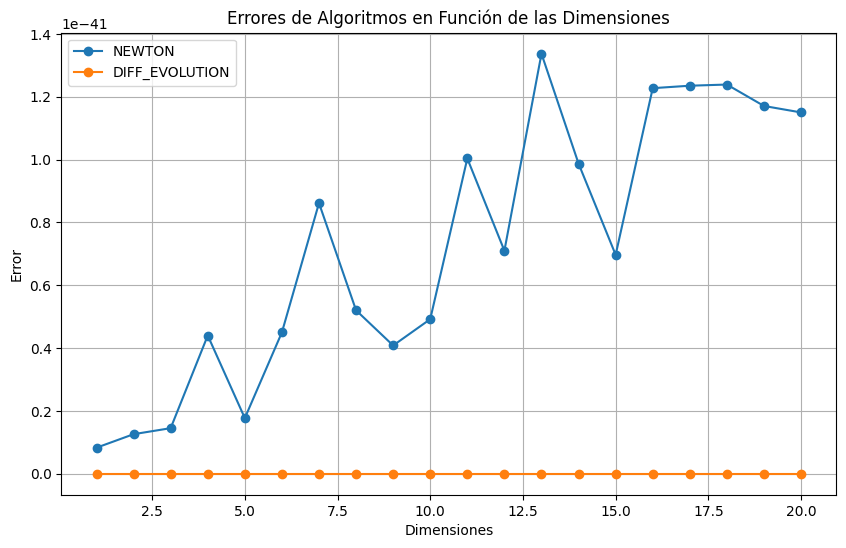

In [14]:

dimensions = np.arange(1, 21)  # Dimensiones de 1 a 20

# Crear el gráfico
plt.figure(figsize=(10, 6))
np.abs
# Graficar cada conjunto de errores
plt.plot(dimensions, np.abs(newton_sols), marker='o', label='NEWTON')
plt.plot(dimensions, np.abs(diff_evol_sols), marker='o', label='DIFF_EVOLUTION')
# plt.plot(dimensions, np.abs(sim_annealing_sols), marker='o', label='SIM_ANNEALING')

# Configurar los ejes y la leyenda
plt.xlabel('Dimensiones')
plt.ylabel('Error')
plt.title('Errores de Algoritmos en Función de las Dimensiones')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

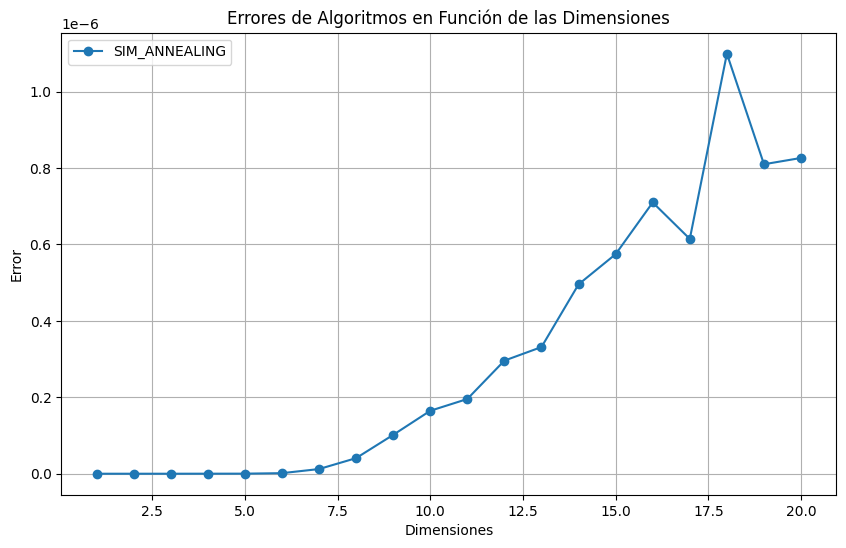

In [15]:

dimensions = np.arange(1, 21)  # Dimensiones de 1 a 20

# Crear el gráfico
plt.figure(figsize=(10, 6))
np.abs
# Graficar cada conjunto de errores
plt.plot(dimensions, np.abs(sim_annealing_sols), marker='o', label='SIM_ANNEALING')

# Configurar los ejes y la leyenda
plt.xlabel('Dimensiones')
plt.ylabel('Error')
plt.title('Errores de Algoritmos en Función de las Dimensiones')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

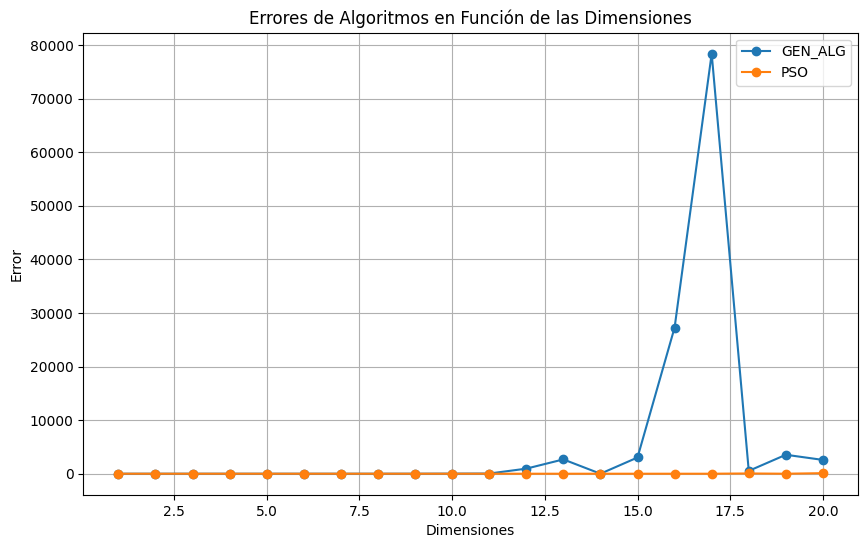

In [16]:

dimensions = np.arange(1, 21)  # Dimensiones de 1 a 20

# Crear el gráfico
plt.figure(figsize=(10, 6))
np.abs
# Graficar cada conjunto de errores
plt.plot(dimensions, np.abs(genetic_alg_sols), marker='o', label='GEN_ALG')
plt.plot(dimensions, np.abs(particle_swarm_sols), marker='o', label='PSO')

# Configurar los ejes y la leyenda
plt.xlabel('Dimensiones')
plt.ylabel('Error')
plt.title('Errores de Algoritmos en Función de las Dimensiones')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

### Conclusiones respecto a la similitud con el mínimo global:
- Los mejores resultados fueron obtenidos por la **`Evolución Diferencial`** y el **`Método de Newton`**. 
- La **`Evolución Diferencial`** se mantiene con error 0 para dimensiones menores a 20 y para mayores el error es mínimo. 
- A su vez, los errores del **`Método de Newton`** oscilan entre valores muy bajos.

In [17]:
print(diff_evol_sols)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.940709408707604e-140]


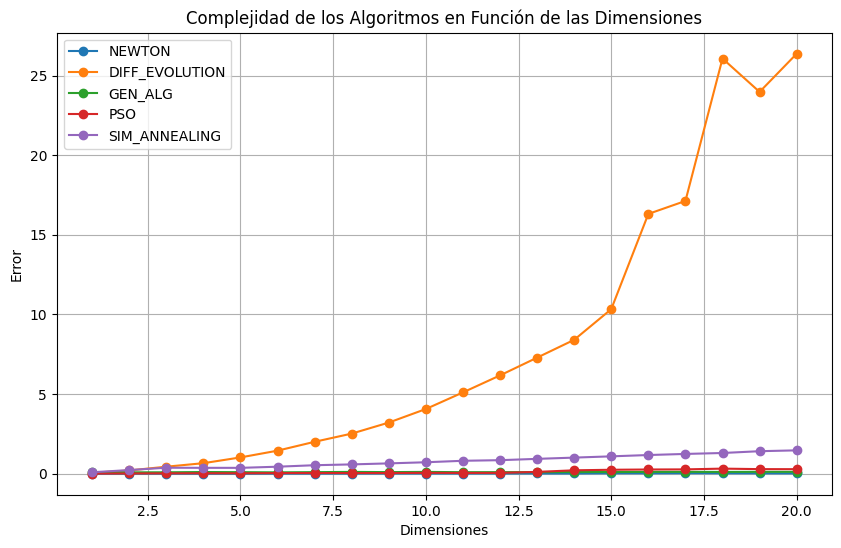

In [18]:

dimensions = np.arange(1, 21)  # Dimensiones de 1 a 20

# Crear el gráfico
plt.figure(figsize=(10, 6))
np.abs
# Graficar cada conjunto de errores
plt.plot(dimensions, newton_times, marker='o', label='NEWTON')
plt.plot(dimensions, diff_evol_times, marker='o', label='DIFF_EVOLUTION')
plt.plot(dimensions,genetic_alg_times, marker='o', label='GEN_ALG')
plt.plot(dimensions, particle_swarm_times, marker='o', label='PSO')
plt.plot(dimensions, sim_annealing_times, marker='o', label='SIM_ANNEALING')
# plt.plot(dimensions, np.abs(sim_annealing_sols), marker='o', label='SIM_ANNEALING')

# Configurar los ejes y la leyenda
plt.xlabel('Dimensiones')
plt.ylabel('Error')
plt.title('Complejidad de los Algoritmos en Función de las Dimensiones')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

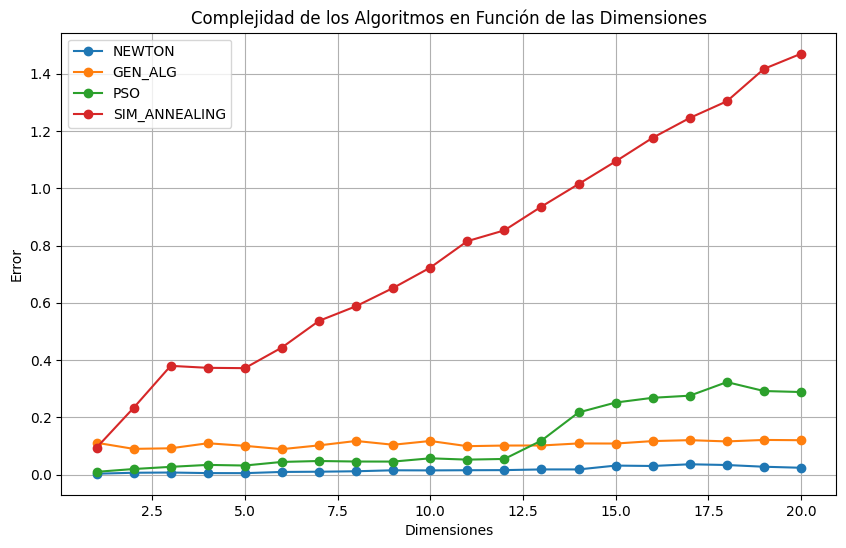

In [19]:
import matplotlib.pyplot as plt
dimensions = np.arange(1, 21)  # Dimensiones de 1 a 20

# Crear el gráfico
plt.figure(figsize=(10, 6))
np.abs
# Graficar cada conjunto de errores
plt.plot(dimensions, newton_times, marker='o', label='NEWTON')
plt.plot(dimensions,genetic_alg_times, marker='o', label='GEN_ALG')
plt.plot(dimensions, particle_swarm_times, marker='o', label='PSO')
plt.plot(dimensions, sim_annealing_times, marker='o', label='SIM_ANNEALING')

# Configurar los ejes y la leyenda
plt.xlabel('Dimensiones')
plt.ylabel('Error')
plt.title('Complejidad de los Algoritmos en Función de las Dimensiones')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

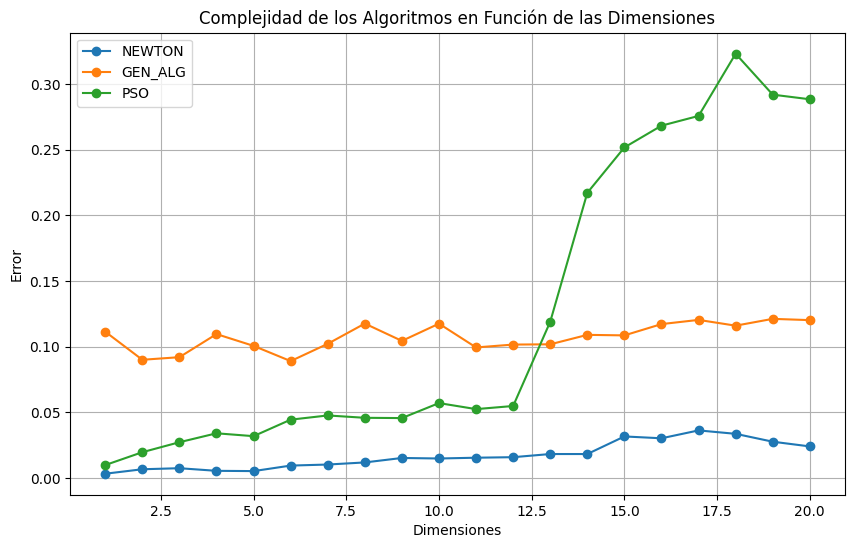

In [20]:

dimensions = np.arange(1, 21)  # Dimensiones de 1 a 20

# Crear el gráfico
plt.figure(figsize=(10, 6))
np.abs
# Graficar cada conjunto de errores
plt.plot(dimensions, newton_times, marker='o', label='NEWTON')
plt.plot(dimensions,genetic_alg_times, marker='o', label='GEN_ALG')
plt.plot(dimensions, particle_swarm_times, marker='o', label='PSO')

# Configurar los ejes y la leyenda
plt.xlabel('Dimensiones')
plt.ylabel('Error')
plt.title('Complejidad de los Algoritmos en Función de las Dimensiones')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

### Conclusiones respecto a la complejidad temporal:
- A medida que aumenta la dimensión para cada uno de estos algoritmos aumenta la complejidad temporal, ya que las operaciones se hacen más costosas con más dimensiones
- La **`Evolución Diferencial`** es el algoritmo cuya complejidad aumenta en mayor proporción a medida que aumentan las dimensiones, mientras que el **`Método de Newton`** mantiene la menor complejidad para todas las dimensiones y presenta un aumento mínimo en la de esta
- El **`Algoritmo Genético`** para dimensiones menores a 12 presenta una complejidad relativamente baja pero con el aumento de las dimensiones posteriores se ve afectada su rapidez

## Mejor Algoritmo:     *"Método de Newton"*
- Presenta los mejores resultados en relación cercanía con el mínimo global y complejidad temporal del algoritmo. A pesar de que la **Evolución Diferencial** muestra valores más cercanos al mínimo global, en costo computacional no es un algoritmo útil para dimensiones muy grandes. Como el **Método de Newton** dista en una proporción muy pequeña del mínimo global y es el algoritmo más eficiente, promete resultados extraordinarios para dimensiones de gran valor.



In [25]:
mean_solutions = []
mean_times = []
for d in range(100):
    solutions,run_times = iter_algorithm(times,run_newton_method,d+21)
    mean_sol = np.mean(solutions)
    mean_time = np.mean(run_times)
    mean_solutions.append(mean_sol)
    mean_times.append(mean_time)

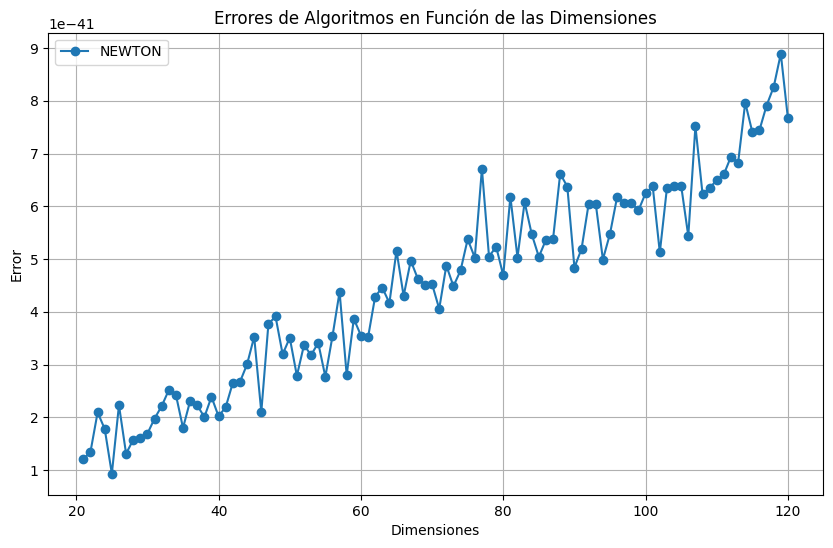

In [27]:
dimensions = np.arange(21, 121)  # Dimensiones de 21 a 40

# Crear el gráfico
plt.figure(figsize=(10, 6))
np.abs
# Graficar cada conjunto de errores
plt.plot(dimensions, np.abs(mean_solutions), marker='o', label='NEWTON')

# Configurar los ejes y la leyenda
plt.xlabel('Dimensiones')
plt.ylabel('Error')
plt.title('Errores de Algoritmos en Función de las Dimensiones')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [28]:
mean_solutions = []
mean_times = []
for d in range(100):
    solutions,run_times = iter_algorithm(times,run_newton_method,d+121)
    mean_sol = np.mean(solutions)
    mean_time = np.mean(run_times)
    mean_solutions.append(mean_sol)
    mean_times.append(mean_time)

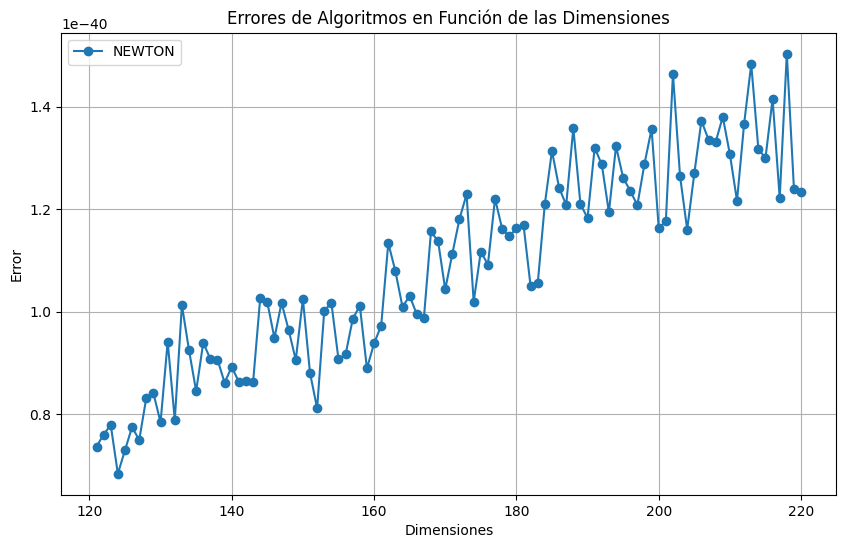

In [30]:
dimensions = np.arange(121, 221)  # Dimensiones de 21 a 40

# Crear el gráfico
plt.figure(figsize=(10, 6))
np.abs
# Graficar cada conjunto de errores
plt.plot(dimensions, np.abs(mean_solutions), marker='o', label='NEWTON')

# Configurar los ejes y la leyenda
plt.xlabel('Dimensiones')
plt.ylabel('Error')
plt.title('Errores de Algoritmos en Función de las Dimensiones')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [31]:
mean_solutions = []
mean_times = []
for d in range(20):
    solutions,run_times = iter_algorithm(times,run_newton_method,d+1000)
    mean_sol = np.mean(solutions)
    mean_time = np.mean(run_times)
    mean_solutions.append(mean_sol)
    mean_times.append(mean_time)

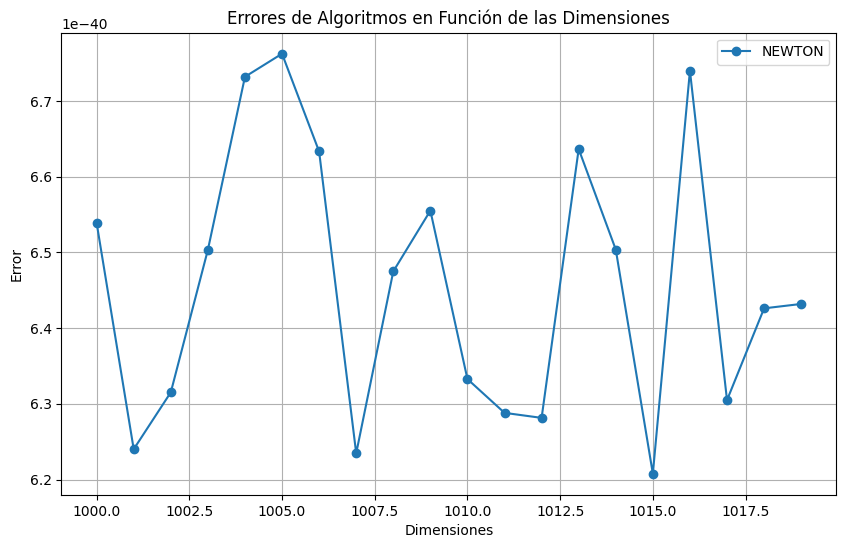

In [33]:
dimensions = np.arange(1000, 1020)  # Dimensiones de 21 a 40

# Crear el gráfico
plt.figure(figsize=(10, 6))
np.abs
# Graficar cada conjunto de errores
plt.plot(dimensions, np.abs(mean_solutions), marker='o', label='NEWTON')

# Configurar los ejes y la leyenda
plt.xlabel('Dimensiones')
plt.ylabel('Error')
plt.title('Errores de Algoritmos en Función de las Dimensiones')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

Puede apreciarse que aún para dimensiones mucho más grandes el **`Método de Newton`** sigue proporcionando buenas aproximaciones al mínimo global